# Phase 1 Graded Challenge 1

Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep Regression.

## i. Perkenalan

Nama  : Raden Mas Xyla Ramadhan

Batch : 13

### Dataset

Uber and Lyft Dataset Boston, MA

### Objective

Mampu memahami konsep regression dengan Linear Regression.

Mampu mempersiapkan data untuk digunakan dalam model Linear Regression.

Mampu mengimplementasikan Linear Regression untuk membuat prediksi.

## ii. Import Libraries

In [1]:
#import library python yang dipakai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder


## iii. Data Loading

In [2]:
#loading data
data = pd.read_csv('rideshare_kaggle.csv')
data.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1544979600           39.89   
1     Lyft  ...             0.1300  1543251600           40.49   
2     Lyft  ...             0.1064  1543338000           35.36   
3     Lyft  ...             0.0000  1543507200           34.67   
4     Lyft  ...             0.0001  1543420800           33.10   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000           43.68          1544968800   
1          1543233600           47.30          1543251600   
2          1543377600           47.55          1543320000   
3          1543550400           45.03          1543510800   
4          1543402800           42.18          1543420800   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73                  1545012000                   38.07   
1                   36.20                  1543291200                   43.92   
2                   31.04                  1543377600                   44.12   
3                   30.30                  1543550400                   38.53   
4                   29.11                  1543392000                   35.75   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  
3                 1543510800  
4                 1543420800  

[5 rows x 57 columns]

### Cek Informasi Data 

In [3]:
#cek informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

bisa kita liat dari informasi tersebut 

dari 56 tipe data 
29 adalah float64, 17 adalah int64 dan 11 adalah object

RangeIndex: 693071 entries, 0 to 693070

Data columns (total 57 columns)

In [4]:
data.shape

(693071, 57)

### Cek Duplikasi Data 

In [5]:
data.duplicated().sum()

0

setelah di cek ternyata tidak ada duplikasi data sama sekali menandakan bahwa setiap data yang di input adalah unique

### Cek Deskripsi Data

In [6]:
data.describe()

timestamp           hour            day          month  \
count  6.930710e+05  693071.000000  693071.000000  693071.000000   
mean   1.544046e+09      11.619137      17.794365      11.586684   
std    6.891925e+05       6.948114       9.982286       0.492429   
min    1.543204e+09       0.000000       1.000000      11.000000   
25%    1.543444e+09       6.000000      13.000000      11.000000   
50%    1.543737e+09      12.000000      17.000000      12.000000   
75%    1.544828e+09      18.000000      28.000000      12.000000   
max    1.545161e+09      23.000000      30.000000      12.000000   

               price       distance  surge_multiplier       latitude  \
count  637976.000000  693071.000000     693071.000000  693071.000000   
mean       16.545125       2.189430          1.013870      42.338172   
std         9.324359       1.138937          0.091641       0.047840   
min         2.500000       0.020000          1.000000      42.214800   
25%         9.000000       1.280000          1.000000      42.350300   
50%        13.500000       2.160000          1.000000      42.351900   
75%        22.500000       2.920000          1.000000      42.364700   
max        97.500000       7.860000          3.000000      42.366100   

           longitude    temperature  ...  precipIntensityMax   uvIndexTime  \
count  693071.000000  693071.000000  ...       693071.000000  6.930710e+05   
mean      -71.066151      39.584388  ...            0.037374  1.544044e+09   
std         0.020302       6.726084  ...            0.055214  6.912028e+05   
min       -71.105400      18.910000  ...            0.000000  1.543162e+09   
25%       -71.081000      36.450000  ...            0.000000  1.543421e+09   
50%       -71.063100      40.490000  ...            0.000400  1.543770e+09   
75%       -71.054200      43.580000  ...            0.091600  1.544807e+09   
max       -71.033000      57.220000  ...            0.145900  1.545152e+09   

       temperatureMin  temperatureMinTime  temperatureMax  temperatureMaxTime  \
count   693071.000000        6.930710e+05   693071.000000        6.930710e+05   
mean        33.457774        1.544042e+09       45.261313        1.544047e+09   
std          6.467224        6.901954e+05        5.645046        6.901353e+05   
min         15.630000        1.543122e+09       33.510000        1.543154e+09   
25%         30.170000        1.543399e+09       42.570000        1.543439e+09   
50%         34.240000        1.543727e+09       44.680000        1.543788e+09   
75%         38.880000        1.544789e+09       46.910000        1.544814e+09   
max         43.100000        1.545192e+09       57.870000        1.545109e+09   

       apparentTemperatureMin  apparentTemperatureMinTime  \
count           693071.000000                6.930710e+05   
mean                29.731002                1.544048e+09   
std                  7.110494                6.871862e+05   
min                 11.810000                1.543136e+09   
25%                 27.760000                1.543399e+09   
50%                 30.130000                1.543745e+09   
75%                 35.710000                1.544789e+09   
max                 40.050000                1.545134e+09   

       apparentTemperatureMax  apparentTemperatureMaxTime  
count           693071.000000                6.930710e+05  
mean                41.997343                1.544048e+09  
std                  6.936841                6.910777e+05  
min                 28.950000                1.543187e+09  
25%                 36.570000                1.543439e+09  
50%                 40.950000                1.543788e+09  
75%                 44.120000                1.544818e+09  
max                 57.200000                1.545109e+09  

[8 rows x 46 columns]

bisa dilihat dari dataframe bahwa ada 46 data yang merupakan numerical columns

min price adalah  2.5 dan max price adalah 97.5

min distance adalah 0.02 max distance adalah 7.86

min surge multiplier adalah 1.00 dan max surge multiplier adalah 3.00

### Cek Missing Value

In [7]:
data.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

setelah kita cek terdapat 55095 missing value dari price dari total 693071 baris 

In [8]:
55095/693071*100

7.949402009317949

ada 7,94% missing value kolom price dari total keseluruhan data

untuk handling missing value dilangkah data preprocessing untuk saat ini hanya cek missing value saja

## iv. Exploratory Data Analysis (EDA)

Karena terdapat 57 jumlah kolom didalam dataset, maka akan dilakukan eksplorasi data yang berhubungan atau berkorelasi dengan target yang akan diprediksi 

Karena kolom price adalah target yang akan diprediksi oleh karena itu saya akan memfokuskan terhadap korelasi tabel price dengan kolom yang lain 


terdapat 46 numerical columns dan 11 categorical objects oleh karena itu saya akan pisahkan data nya untuk correlation

In [9]:
num_data = data.select_dtypes(include=np.number)
cat_data = data.select_dtypes(include=['object'])

### Correlation Between Numerical Columns

In [10]:
corr_num = num_data.corr()
corr_num.style.background_gradient(cmap='RdBu')

bisa dilihat kolom price memiliki korelasi dengan kolom distance dan surge_multiplier yaitu 

distance 0.345061, surge_multiplier 0.240458

Maka kolom numerical yang akan digunakan sebagai feature adalah kolom distance dan surge_multiplier saja, karena dari hasil correlation matrix diatas nilai correlation kolom price dengan kolom lain selain distance dan surge_multiplier mendekati 0 .

### Correlation Between Categorical Columns

cek data categorical data

In [11]:
cat_data.head()

id             datetime  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  2018-12-16 09:30:07   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  2018-11-27 02:00:23   
2  981a3613-77af-4620-a42a-0c0866077d1e  2018-11-28 01:00:22   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  2018-11-30 04:53:02   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  2018-11-29 03:49:20   

           timezone            source    destination cab_type    product_id  \
0  America/New_York  Haymarket Square  North Station     Lyft     lyft_line   
1  America/New_York  Haymarket Square  North Station     Lyft  lyft_premier   
2  America/New_York  Haymarket Square  North Station     Lyft          lyft   
3  America/New_York  Haymarket Square  North Station     Lyft   lyft_luxsuv   
4  America/New_York  Haymarket Square  North Station     Lyft     lyft_plus   

           name    short_summary  \
0        Shared   Mostly Cloudy    
1           Lux            Rain    
2          Lyft           Clear    
3  Lux Black XL           Clear    
4       Lyft XL   Partly Cloudy    

                                        long_summary                   icon  
0                          Rain throughout the day.    partly-cloudy-night   
1   Rain until morning, starting again in the eve...                  rain   
2                        Light rain in the morning.            clear-night   
3                 Partly cloudy throughout the day.            clear-night   
4                 Mostly cloudy throughout the day.    partly-cloudy-night

id,datetime,product_id,long_summary tidak perlu ditampilkan di korelasi karena id sudah direpresentasikan oleh name , dan long_summary sudah direpresentasikan oleh short_summary

In [12]:
# korelasikan price dengan categorical column
corr_cat = pd.get_dummies(data[['price','source','destination','cab_type','name','short_summary','icon']]).corr()
corr_cat.style.background_gradient(cmap='RdBu')

bisa dilihat kolom price memiliki korelasi dengan kolom name yaitu 

name_Black SUV 0.453096, name_Lux Black 0.206544, name_Lux Black XL	0.500057	

Maka kolom categorical yang akan digunakan sebagai feature hanya kolom name saja, karena dari hasil correlation matrix diatas nilai correlation kolom price dengan kolom lain selain name mendekati 0

### Price Uber Vs Lyft

Pisahkan data uber dengan lyft

In [13]:
lyft_data = data[data["cab_type"] == "Lyft"]
uber_data = data[data["cab_type"] == "Uber"]

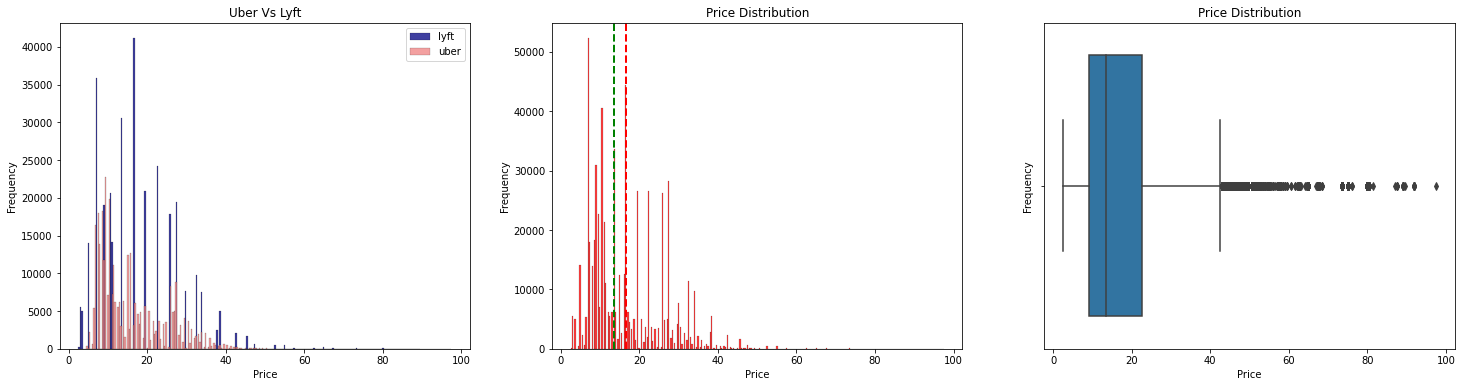

Skewness: 1.0457470560899256
Mean: 16.545125490614065
Median: 13.5
Mean Uber: 17.351396125019512
Mean Lyft: 15.795343166912708


In [14]:
plt.figure(figsize=(25,6))
plt.subplot(1, 3, 1)
sns.histplot(lyft_data, x='price',label='lyft',color='navy')
sns.histplot(uber_data, x='price',label='uber', color='lightcoral')
plt.title('Uber Vs Lyft')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(data, x='price',label='all data', color='red')
plt.axvline(data.price.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.price.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.subplot(1, 3, 3)
sns.boxplot(x='price', data=data, )
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness: {data.price.skew()}')
print(f'Mean: {data.price.mean()}')
print(f'Median: {data.price.median()}')

print(f'Mean Uber: {lyft_data.price.mean()}')
print(f'Mean Lyft: {uber_data.price.mean()}')

Bisa diliat dari visualiasi diatas bahwa kolom price memiliki skewness sebesar 1.04 yang berarti positively skewed. dan dari boxplot bisa diliat bahwa kolom price memiliki outlier


### Korelasi Price dengan Surge_Multiplier Uber Vs Lyft

<AxesSubplot:xlabel='price', ylabel='surge_multiplier'>

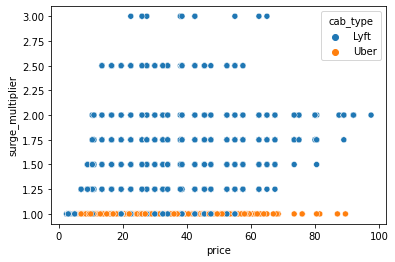

In [15]:
sns.scatterplot(data=data, x="price", y="surge_multiplier", hue="cab_type")

Surge multiplier terjadi ketika sebuah perusahaan menaikkan harga penawarannya jika ada peningkatan permintaan. 

Misalnya, Lyft  mengumumkan bahwa mereka akan menerapkan "Surge multiplier" pada Malam Natal dan Tahun Baru.

Dari visualisasi tabel diatas bisa diliat bahwa yang memiliki surge multiplier hanyalah Lyft dari 1.0 sampai 3.0 sedangkan uber tidak memiliki surge multiplier

### Korelasi Price dengan Distance Uber Vs Lyft

<AxesSubplot:xlabel='distance', ylabel='price'>

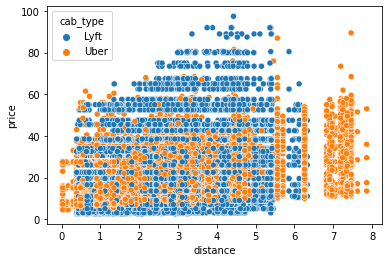

In [16]:
sns.scatterplot(data=data, x="distance", y="price", hue="cab_type")

Dari visualisasi tabel diatas bisa diliat bahwa
- Lyft lebih mahal dari uber dikarenakan Surge multiplier
- Distance paling jauh Lyft adalah 6.33 sedangkan distance paling jauh Uber adalah 7.86

### Product ID dan Name

In [17]:
data.groupby(['product_id', 'name']).size()

product_id                            name        
55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX           55094
6c84fd89-3f11-4782-9b50-97c468b19529  Black           55095
6d318bcc-22a3-4af6-bddd-b409bfce1546  Black SUV       55096
6f72dfc5-27f1-42e8-84db-ccc7a75f6969  UberXL          55096
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi            55095
997acbb5-e102-41e1-b155-9df7de0a73f2  UberPool        55091
9a0e7b09-b92b-4c41-9779-2ad22b4d779d  WAV             55096
lyft                                  Lyft            51235
lyft_line                             Shared          51233
lyft_lux                              Lux Black       51235
lyft_luxsuv                           Lux Black XL    51235
lyft_plus                             Lyft XL         51235
lyft_premier                          Lux             51235
dtype: int64

Tabel diatas menunjukkan bahwa name telah merepresentasikan product_id, maka product id tidak perlu dimasukkan kedalam feature

### Hour, Day, Month Uber vs Lyft

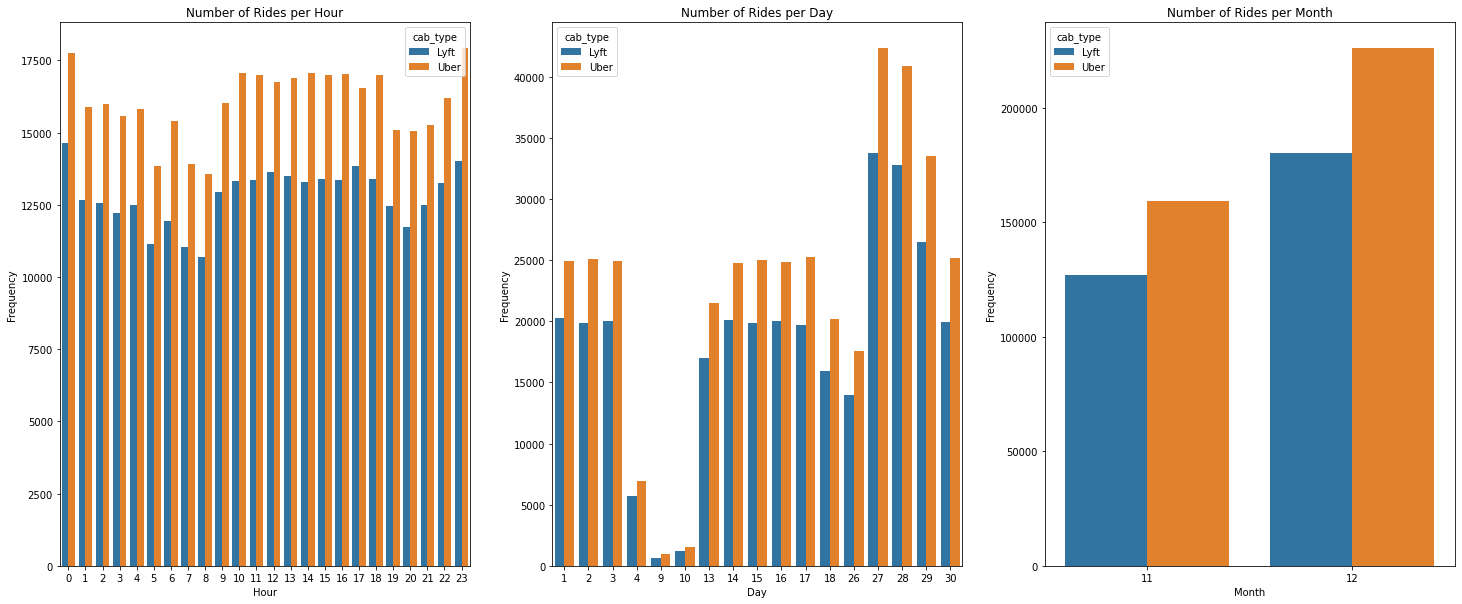

In [18]:
plt.figure(figsize=(25,10))
plt.subplot(1, 3, 1)
sns.countplot(x='hour', data=data, hue='cab_type')
plt.title('Number of Rides per Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.subplot(1, 3, 2)
sns.countplot(x='day', data=data, hue='cab_type')
plt.title('Number of Rides per Day')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.subplot(1, 3, 3)
sns.countplot(x='month', data=data, hue='cab_type' )
plt.title('Number of Rides per Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

Berdasarkan visualisasi data diatas, terlihat bahwa pemesanan didominasi oleh tipe Uber dibandingkan dengan Lyft untuk melihat kenapa uber mendominasi kita lihat perbandingan data uber dan lyft di visualisasi dibawah

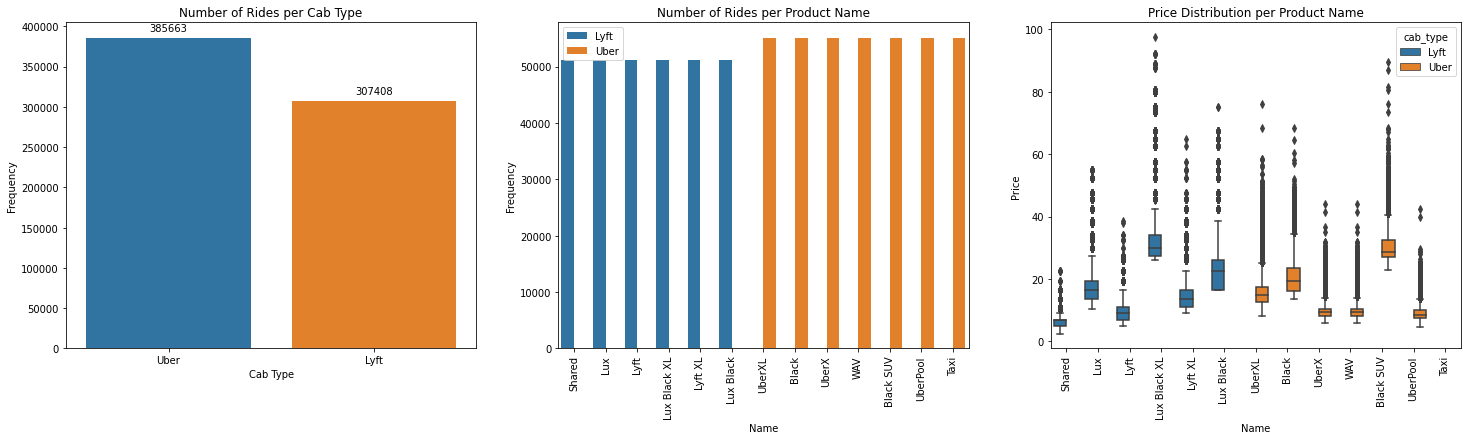

In [19]:
plt.figure(figsize=(25,6))
plt.subplot(1, 3, 1)
cab = sns.countplot(x='cab_type', data=data, order=data.cab_type.value_counts().index)
for p in cab.patches:
    cab.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Number of Rides per Cab Type')
plt.xlabel('Cab Type')
plt.ylabel('Frequency')
plt.subplot(1, 3, 2)
sns.countplot(x='name', data=data, hue='cab_type')
plt.title('Number of Rides per Product Name')
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.subplot(1, 3, 3)
sns.boxplot(x='name', y='price', data=data, hue='cab_type')
plt.title('Price Distribution per Product Name')
plt.xlabel('Name')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [20]:
#presentase Uber
385663/693071*100

55.645525494502

In [21]:
#presentase Lyft
307408/693071*100

44.35447450549799

### insight yang didapat dan hal yang menarik

Terlihat bahwa uber mendapatkan pemesanan sebanyak 385663 yaitu 55.64% dari total dataset sedangkan Lyft memiliki pemesanan sebanyak 307408 yaitu 44.35% dari total dataset ini yang membuat uber mendominasi pemesanan dari mulai jam,hari dan bulan.

yang menariknya adalah tidak ada satu hari pun lyft mengalahkan pemesanan uber

dan dari box plot menunjukan bahwa produk yang dipilih oleh penumpang akan mempengaruhi price

Desember mempunyai lebih banyak data dari November karena range data dari tanggal 11-26-2018 to 12-18-2018

5 hari di bulan November dan 18 hari di bulan Desember

Dari Visualisasi tersebut yang menarik perhatian saya adalah ada apa dengan tanggal 9 dan 10, yang menyebabkan pemesanan uber dan lyft menurun drastis

ternyata adanya missing data dari tanggal 5 sampai tanggal 8 dan berpengaruh juga di tanggal 4, 9 dan 10. sehingga terkesan bahwa tanggal 9 dan 10 mengalami penurunan drastis

## v. Data Preprocessing

### Get Data for Model Inference

In [22]:
data_inf = data.sample(10, random_state=30)
data_inf

id     timestamp  hour  day  month  \
418498  66a79fdc-1595-42b3-b28f-285aaebfcaec  1.544883e+09    14   15     12   
599390  cf48b3da-90d2-4bdd-a3f9-a0aa132ec165  1.544912e+09    22   15     12   
209422  ea45cca5-81f9-47c5-93ec-e7d82e68a9f6  1.543492e+09    11   29     11   
262561  352a8c51-907c-46bc-b622-85357609c988  1.543778e+09    19    2     12   
108636  68581606-3daf-46ac-a09f-cac09a9f76dc  1.544705e+09    12   13     12   
675706  eaaadef4-1396-4ba6-a0ca-53e75bdfd077  1.543632e+09     2    1     12   
238737  a28f68a0-5f2d-4dd2-b2a9-5d90858736c5  1.543723e+09     4    2     12   
556969  2c54f601-0116-4feb-a04e-044082949175  1.543246e+09    15   26     11   
188340  ada64d05-007e-4490-96d9-cb26165fc177  1.545010e+09     1   17     12   
226662  9e6f172e-ff40-478a-9b80-6a90156f87f5  1.543276e+09    23   26     11   

                   datetime          timezone                   source  \
418498  2018-12-15 14:10:03  America/New_York         Theatre District   
599390  2018-12-15 22:15:10  America/New_York       Financial District   
209422  2018-11-29 11:42:56  America/New_York                North End   
262561  2018-12-02 19:17:57  America/New_York            South Station   
108636  2018-12-13 12:50:15  America/New_York                 Back Bay   
675706  2018-12-01 02:42:59  America/New_York  Northeastern University   
238737  2018-12-02 04:03:03  America/New_York       Financial District   
556969  2018-11-26 15:23:09  America/New_York                North End   
188340  2018-12-17 01:25:08  America/New_York        Boston University   
226662  2018-11-26 23:45:14  America/New_York                North End   

               destination cab_type  ... precipIntensityMax uvIndexTime  \
418498   Boston University     Lyft  ...             0.0074  1544893200   
599390           North End     Uber  ...             0.0074  1544893200   
209422       North Station     Lyft  ...             0.0000  1543507200   
262561       North Station     Uber  ...             0.0916  1543770000   
108636    Haymarket Square     Uber  ...             0.0001  1544720400   
675706       North Station     Lyft  ...             0.0004  1543593600   
238737    Haymarket Square     Lyft  ...             0.0000  1543683600   
556969  Financial District     Uber  ...             0.1234  1543251600   
188340         Beacon Hill     Uber  ...             0.1261  1544979600   
226662         Beacon Hill     Uber  ...             0.1225  1543251600   

        temperatureMin  temperatureMinTime  temperatureMax  \
418498           39.54          1544929200           54.47   
599390           39.48          1544929200           54.47   
209422           34.67          1543550400           45.03   
262561           36.32          1543726800           50.80   
108636           18.11          1544688000           33.51   
675706           28.64          1543575600           42.57   
238737           31.55          1543658400           44.72   
556969           40.74          1543233600           46.27   
188340           39.07          1544954400           43.70   
226662           40.45          1543233600           46.49   

        temperatureMaxTime  apparentTemperatureMin  \
418498          1544896800                   36.46   
599390          1544896800                   36.40   
209422          1543510800                   30.30   
262561          1543788000                   35.84   
108636          1544731200                   14.08   
675706          1543600800                   27.20   
238737          1543690800                   27.95   
556969          1543255200                   37.46   
188340          1544990400                   33.64   
226662          1543255200                   37.17   

        apparentTemperatureMinTime  apparentTemperatureMax  \
418498                  1544929200                   53.80   
599390                  1544929200                   53.80   
209422                  1543550400                   38.

### Remove Inference-Set from Dataset

In [23]:
#### Remove Inference-Set from Dataset
data_train_test = data.drop(data_inf.index)
data_train_test

id     timestamp  hour  day  month  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1       4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2       981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
...                                      ...           ...   ...  ...    ...   
693066  616d3611-1820-450a-9845-a9ff304a4842  1.543708e+09    23    1     12   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341  1.543708e+09    23    1     12   
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f  1.543708e+09    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e  1.543708e+09    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda  1.543708e+09    23    1     12   

                   datetime          timezone            source  \
0       2018-12-16 09:30:07  America/New_York  Haymarket Square   
1       2018-11-27 02:00:23  America/New_York  Haymarket Square   
2       2018-11-28 01:00:22  America/New_York  Haymarket Square   
3       2018-11-30 04:53:02  America/New_York  Haymarket Square   
4       2018-11-29 03:49:20  America/New_York  Haymarket Square   
...                     ...               ...               ...   
693066  2018-12-01 23:53:05  America/New_York          West End   
693067  2018-12-01 23:53:05  America/New_York          West End   
693068  2018-12-01 23:53:05  America/New_York          West End   
693069  2018-12-01 23:53:05  America/New_York          West End   
693070  2018-12-01 23:53:05  America/New_York          West End   

          destination cab_type  ... precipIntensityMax uvIndexTime  \
0       North Station     Lyft  ...             0.1276  1544979600   
1       North Station     Lyft  ...             0.1300  1543251600   
2       North Station     Lyft  ...             0.1064  1543338000   
3       North Station     Lyft  ...             0.0000  1543507200   
4       North Station     Lyft  ...             0.0001  1543420800   
...               ...      ...  ...                ...         ...   
693066      North End     Uber  ...             0.0000  1543683600   
693067      North End     Uber  ...             0.0000  1543683600   
693068      North End     Uber  ...             0.0000  1543683600   
693069      North End     Uber  ...             0.0000  1543683600   
693070      North End     Uber  ...             0.0000  1543683600   

        temperatureMin  temperatureMinTime  temperatureMax  \
0                39.89          1545012000           43.68   
1                40.49          1543233600           47.30   
2                35.36          1543377600           47.55   
3                34.67          1543550400           45.03   
4                33.10          1543402800           42.18   
...                ...                 ...             ...   
693066           31.42          1543658400           44.76   
693067           31.42          1543658400           44.76   
693068           31.42          1543658400           44.76   
693069           31.42          1543658400           44.76   
693070           31.42          1543658400           44.76   

        temperatureMaxTime  apparentTemperatureMin  \
0               1544968800                   33.73   
1               1543251600                   36.20   
2               1543320000                   31.04   
3               1543510800                   30.30   
4               1543420800                   29.11   
...                    ...                     ...   
693066          1543690800                   27.77   
693067          1543690800                   27.77   
693068          1543690800                   27.77   
693069          1543690800                   27.77   
693070          1543690800                   27.77   

        apparentTemperatureMinTime  appar

#### Reset Index

In [24]:
#reset index
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

id     timestamp  hour  day  month  \
0  66a79fdc-1595-42b3-b28f-285aaebfcaec  1.544883e+09    14   15     12   
1  cf48b3da-90d2-4bdd-a3f9-a0aa132ec165  1.544912e+09    22   15     12   
2  ea45cca5-81f9-47c5-93ec-e7d82e68a9f6  1.543492e+09    11   29     11   
3  352a8c51-907c-46bc-b622-85357609c988  1.543778e+09    19    2     12   
4  68581606-3daf-46ac-a09f-cac09a9f76dc  1.544705e+09    12   13     12   
5  eaaadef4-1396-4ba6-a0ca-53e75bdfd077  1.543632e+09     2    1     12   
6  a28f68a0-5f2d-4dd2-b2a9-5d90858736c5  1.543723e+09     4    2     12   
7  2c54f601-0116-4feb-a04e-044082949175  1.543246e+09    15   26     11   
8  ada64d05-007e-4490-96d9-cb26165fc177  1.545010e+09     1   17     12   
9  9e6f172e-ff40-478a-9b80-6a90156f87f5  1.543276e+09    23   26     11   

              datetime          timezone                   source  \
0  2018-12-15 14:10:03  America/New_York         Theatre District   
1  2018-12-15 22:15:10  America/New_York       Financial District   
2  2018-11-29 11:42:56  America/New_York                North End   
3  2018-12-02 19:17:57  America/New_York            South Station   
4  2018-12-13 12:50:15  America/New_York                 Back Bay   
5  2018-12-01 02:42:59  America/New_York  Northeastern University   
6  2018-12-02 04:03:03  America/New_York       Financial District   
7  2018-11-26 15:23:09  America/New_York                North End   
8  2018-12-17 01:25:08  America/New_York        Boston University   
9  2018-11-26 23:45:14  America/New_York                North End   

          destination cab_type  ... precipIntensityMax uvIndexTime  \
0   Boston University     Lyft  ...             0.0074  1544893200   
1           North End     Uber  ...             0.0074  1544893200   
2       North Station     Lyft  ...             0.0000  1543507200   
3       North Station     Uber  ...             0.0916  1543770000   
4    Haymarket Square     Uber  ...             0.0001  1544720400   
5       North Station     Lyft  ...             0.0004  1543593600   
6    Haymarket Square     Lyft  ...             0.0000  1543683600   
7  Financial District     Uber  ...             0.1234  1543251600   
8         Beacon Hill     Uber  ...             0.1261  1544979600   
9         Beacon Hill     Uber  ...             0.1225  1543251600   

   temperatureMin  temperatureMinTime  temperatureMax  temperatureMaxTime  \
0           39.54          1544929200           54.47          1544896800   
1           39.48          1544929200           54.47          1544896800   
2           34.67          1543550400           45.03          1543510800   
3           36.32          1543726800           50.80          1543788000   
4           18.11          1544688000           33.51          1544731200   
5           28.64          1543575600           42.57          1543600800   
6           31.55          1543658400           44.72          1543690800   
7           40.74          1543233600           46.27          1543255200   
8           39.07          1544954400           43.70          1544990400   
9           40.45          1543233600           46.49          1543255200   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   36.46                  1544929200                   53.80   
1                   36.40                  1544929200                   53.80   
2                   30.30                  1543550400                   38.53   
3                   35.84                  1543748400                   50.13   
4                   14.08                  1544688000                   32.84   
5                   27.20                  1543568400                   40.51   
6                   27.95                  1543658400                   44.05   
7                   37.46                  1543291200                   43.78   
8                   33.64                  1545019200                   38.29   
9                   37

alasannya di reset index karena ketika data inference diambil ada index menjadi tidak beraturan oleh karena itu lakukan reset index agar index tidak ada missing value

### Splitting Dataset

Membuat training set dan test set dengan perbandingan **80:20**, dimana:
- **80%** data menjadi **training set**
- **20%** data menjadi **test set**

In [25]:
X = data_train_test.drop(['price'], axis=1)
y = data_train_test['price']

X

id     timestamp  hour  day  month  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1       4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2       981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
...                                      ...           ...   ...  ...    ...   
693056  616d3611-1820-450a-9845-a9ff304a4842  1.543708e+09    23    1     12   
693057  633a3fc3-1f86-4b9e-9d48-2b7132112341  1.543708e+09    23    1     12   
693058  64d451d0-639f-47a4-9b7c-6fd92fbd264f  1.543708e+09    23    1     12   
693059  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e  1.543708e+09    23    1     12   
693060  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda  1.543708e+09    23    1     12   

                   datetime          timezone            source  \
0       2018-12-16 09:30:07  America/New_York  Haymarket Square   
1       2018-11-27 02:00:23  America/New_York  Haymarket Square   
2       2018-11-28 01:00:22  America/New_York  Haymarket Square   
3       2018-11-30 04:53:02  America/New_York  Haymarket Square   
4       2018-11-29 03:49:20  America/New_York  Haymarket Square   
...                     ...               ...               ...   
693056  2018-12-01 23:53:05  America/New_York          West End   
693057  2018-12-01 23:53:05  America/New_York          West End   
693058  2018-12-01 23:53:05  America/New_York          West End   
693059  2018-12-01 23:53:05  America/New_York          West End   
693060  2018-12-01 23:53:05  America/New_York          West End   

          destination cab_type  ... precipIntensityMax uvIndexTime  \
0       North Station     Lyft  ...             0.1276  1544979600   
1       North Station     Lyft  ...             0.1300  1543251600   
2       North Station     Lyft  ...             0.1064  1543338000   
3       North Station     Lyft  ...             0.0000  1543507200   
4       North Station     Lyft  ...             0.0001  1543420800   
...               ...      ...  ...                ...         ...   
693056      North End     Uber  ...             0.0000  1543683600   
693057      North End     Uber  ...             0.0000  1543683600   
693058      North End     Uber  ...             0.0000  1543683600   
693059      North End     Uber  ...             0.0000  1543683600   
693060      North End     Uber  ...             0.0000  1543683600   

        temperatureMin  temperatureMinTime  temperatureMax  \
0                39.89          1545012000           43.68   
1                40.49          1543233600           47.30   
2                35.36          1543377600           47.55   
3                34.67          1543550400           45.03   
4                33.10          1543402800           42.18   
...                ...                 ...             ...   
693056           31.42          1543658400           44.76   
693057           31.42          1543658400           44.76   
693058           31.42          1543658400           44.76   
693059           31.42          1543658400           44.76   
693060           31.42          1543658400           44.76   

        temperatureMaxTime  apparentTemperatureMin  \
0               1544968800                   33.73   
1               1543251600                   36.20   
2               1543320000                   31.04   
3               1543510800                   30.30   
4               1543420800                   29.11   
...                    ...                     ...   
693056          1543690800                   27.77   
693057          1543690800                   27.77   
693058          1543690800                   27.77   
693059          1543690800                   27.77   
693060          1543690800                   27.77   

        apparentTemperatureMinTime appare

melakukan pemisahan data antara features (X) dan target (y) dari data_train_test

In [26]:
# Split between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print('X Train Size : ', X_train.shape)
print('y Test Size  : ', X_test.shape)


X Train Size :  (554448, 56)
y Test Size  :  (138613, 56)


### Handling Missing Value

In [27]:
#cek X_train missing value
pd.DataFrame({'missing value X_train': X_train.isna().sum()})

missing value X_train
id                                               0
timestamp                                        0
hour                                             0
day                                              0
month                                            0
datetime                                         0
timezone                                         0
source                                           0
destination                                      0
cab_type                                         0
product_id                                       0
name                                             0
distance                                         0
surge_multiplier                                 0
latitude                                         0
longitude                                        0
temperature                                      0
apparentTemperature                              0
short_summary                                    0
long_summary                                     0
precipIntensity                                  0
precipProbability                                0
humidity                                         0
windSpeed                                        0
windGust                                         0
windGustTime                                     0
visibility                                       0
temperatureHigh                                  0
temperatureHighTime                              0
temperatureLow                                   0
temperatureLowTime                               0
apparentTemperatureHigh                          0
apparentTemperatureHighTime                      0
apparentTemperatureLow                           0
apparentTemperatureLowTime                       0
icon                                             0
dewPoint                                         0
pressure                                         0
windBearing                                      0
cloudCover                                       0
uvIndex                                          0
visibility.1                                     0
ozone                                            0
sunriseTime                                      0
sunsetTime                                       0
moonPhase                                        0
precipIntensityMax                               0
uvIndexTime                                      0
temperatureMin                                   0
temperatureMinTime                               0
temperatureMax                                   0
temperatureMaxTime                               0
apparentTemperatureMin                           0
apparentTemperatureMinTime                       0
apparentTemperatureMax                           0
apparentTemperatureMaxTime                       0

Tidak ada missing value di X_train

In [28]:
#cek X_test missing value
pd.DataFrame({'missing value X_test': X_test.isna().sum()})

missing value X_test
id                                              0
timestamp                                       0
hour                                            0
day                                             0
month                                           0
datetime                                        0
timezone                                        0
source                                          0
destination                                     0
cab_type                                        0
product_id                                      0
name                                            0
distance                                        0
surge_multiplier                                0
latitude                                        0
longitude                                       0
temperature                                     0
apparentTemperature                             0
short_summary                                   0
long_summary                                    0
precipIntensity                                 0
precipProbability                               0
humidity                                        0
windSpeed                                       0
windGust                                        0
windGustTime                                    0
visibility                                      0
temperatureHigh                                 0
temperatureHighTime                             0
temperatureLow                                  0
temperatureLowTime                              0
apparentTemperatureHigh                         0
apparentTemperatureHighTime                     0
apparentTemperatureLow                          0
apparentTemperatureLowTime                      0
icon                                            0
dewPoint                                        0
pressure                                        0
windBearing                                     0
cloudCover                                      0
uvIndex                                         0
visibility.1                                    0
ozone                                           0
sunriseTime                                     0
sunsetTime                                      0
moonPhase                                       0
precipIntensityMax                              0
uvIndexTime                                     0
temperatureMin                                  0
temperatureMinTime                              0
temperatureMax                                  0
temperatureMaxTime                              0
apparentTemperatureMin                          0
apparentTemperatureMinTime                      0
apparentTemperatureMax                          0
apparentTemperatureMaxTime                      0

Tidak ada missing value di X_test

In [29]:
#cek y_train missing value
print('Missing value y_train :' , y_train.isna().sum())

Missing value y_train : 44240


ada 44065 baris missing value di y_train dan hapus missing valuenya

In [30]:
print('Missing value y_test :' , y_test.isna().sum())

Missing value y_test : 10855


ada 11082 baris missing value di y_train dan hapus missing valuenya

In [31]:
#drop kolom yang mempunya missing value di y train
y_train.median()


13.5

In [32]:
y_test.median()

13.5

In [33]:
# membuat fungsi untuk imputasi na
def impute(df, median_value):
    df = df.fillna(median_value)
    return df

masukan median value 13,5

In [34]:
y_train = impute(y_train, 13.5)
y_test = impute(y_test, 13.5)

### Handling Outlier

In [35]:
#buat fungsi tabel untuk X_train
def diagnostic_plots_X(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

In [36]:
#buat fungsi tabel untuk y_train
def diagnostic_plots_y(data):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data)
    plt.title('Boxplot')

    plt.show()

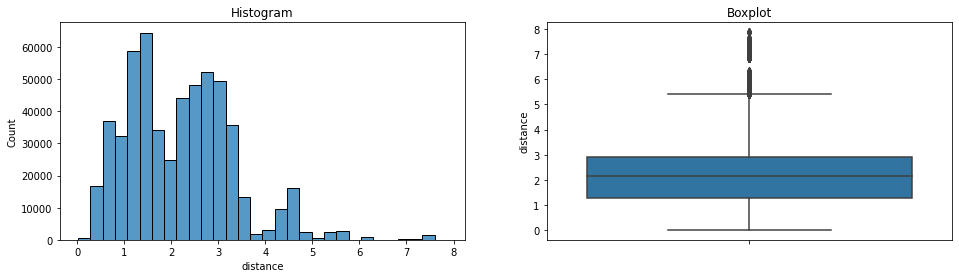

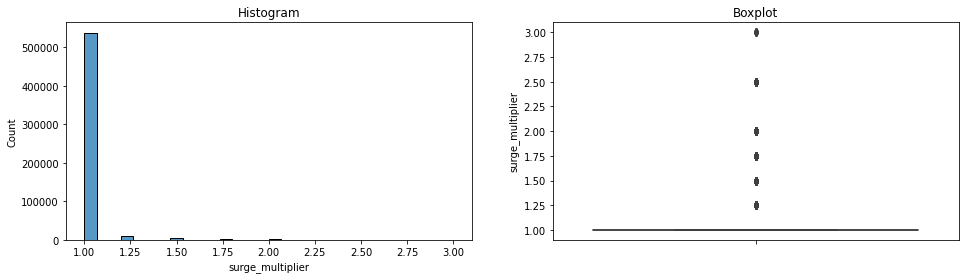

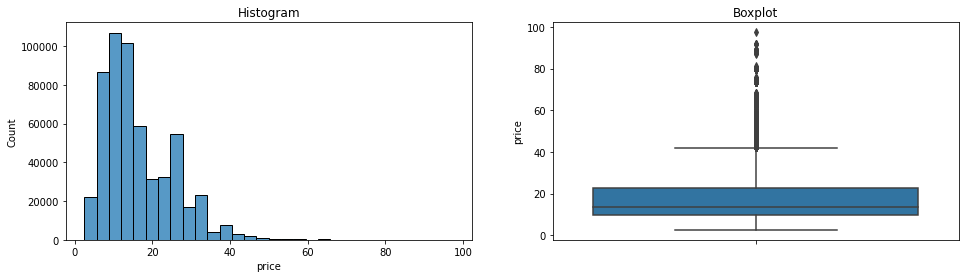

In [37]:
# panggil fungsi

diagnostic_plots_X(X_train, 'distance')
diagnostic_plots_X(X_train, 'surge_multiplier')
diagnostic_plots_y(y_train)

In [38]:
X_train['distance'].skew()

0.8355506349543478

In [39]:
X_train['surge_multiplier'].skew()

8.292767240231013

In [40]:
y_train.skew()

1.1568081008627593

karena distance, surge multiplier dan price nya adalah positively skewed maka gunakan deteksi outlier dengan metode IQR.

In [41]:
# Fungsi untuk mencari upper dan lower boundaries untuk X_train

def find_skewed_boundaries_X(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary_X = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary_X = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary_X, lower_boundary_X

In [42]:
# Fungsi untuk mencari upper dan lower boundaries untuk y_train

def find_skewed_boundaries_y(df, distance):
    IQR = df.quantile(0.75) - df.quantile(0.25)

    lower_boundary_y = df.quantile(0.25) - (IQR * distance)
    upper_boundary_y = df.quantile(0.75) + (IQR * distance)

    return upper_boundary_y, lower_boundary_y

In [43]:
# Limits untuk distance
distance_upper_limit, distance_lower_limit = find_skewed_boundaries_X(X_train, 'distance', 1.5)
distance_upper_limit, distance_lower_limit

# Limits untuk surge_multiplier
surge_multiplier_upper_limit, surge_multiplier_lower_limit = find_skewed_boundaries_X(X_train,'surge_multiplier', 1.5)
surge_multiplier_upper_limit, surge_multiplier_lower_limit

# Limits untuk price
price_upper_limit, price_lower_limit = find_skewed_boundaries_y(y_train, 1.5)
price_upper_limit, price_lower_limit

print('distance_upper_limit : ', distance_upper_limit)
print('distance_lower_limit : ', distance_lower_limit, '\n')
print('surge_multiplier_upper_limit : ', surge_multiplier_upper_limit)
print('surge_multiplier_lower_limit : ', surge_multiplier_lower_limit, '\n')
print('price_upper_limit : ', price_upper_limit)
print('price_lower_limit : ', price_lower_limit)

distance_upper_limit :  5.405
distance_lower_limit :  -1.195 

surge_multiplier_upper_limit :  1.0
surge_multiplier_lower_limit :  1.0 

price_upper_limit :  42.0
price_lower_limit :  -10.0


In [44]:
# Flag the outliers in category distance
outliers_distance =         np.where(X_train['distance'] > distance_upper_limit, True,
                            np.where(X_train['distance'] < distance_lower_limit, True, False))

# Flag the outliers in category surge_multiplier
outliers_surge_multiplier = np.where(X_train['surge_multiplier'] > surge_multiplier_upper_limit, True,
                            np.where(X_train['surge_multiplier'] < surge_multiplier_lower_limit, True, False))

# Flag the outliers in category price
outliers_price =            np.where(y_train > price_upper_limit, True,
                            np.where(y_train < price_lower_limit, True, False))

In [45]:
# trimm the dataset

X_train_trimmed = X_train.loc[~(outliers_distance + outliers_surge_multiplier)]

y_train_trimmed = y_train.loc[~(outliers_price)]

print('X_train dataset - Before trimming : ', X_train.shape)
print('X_train dataset - After trimming  : ', X_train_trimmed.shape)
print('')
print('y_train dataset - Before trimming : ', y_train.shape)
print('y_train dataset - After trimming  : ', y_train_trimmed.shape)



X_train dataset - Before trimming :  (554448, 56)
X_train dataset - After trimming  :  (531024, 56)

y_train dataset - Before trimming :  (554448,)
y_train dataset - After trimming  :  (547963,)


In [46]:
#berapa persen data yang tertrimming di X_train?
(554448-530754)/554448*100

4.273439529045104

sebanyak 4,27% data yang tertrimming di X_train

In [47]:
(510438-505964)/510438*100

0.8765021412982577

sebanyak 0,87% data yang tertrimming di y_train

distance - Before Trimming


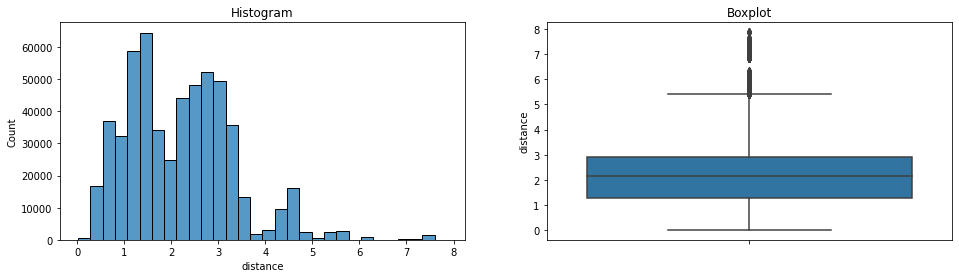


distance - After Trimming


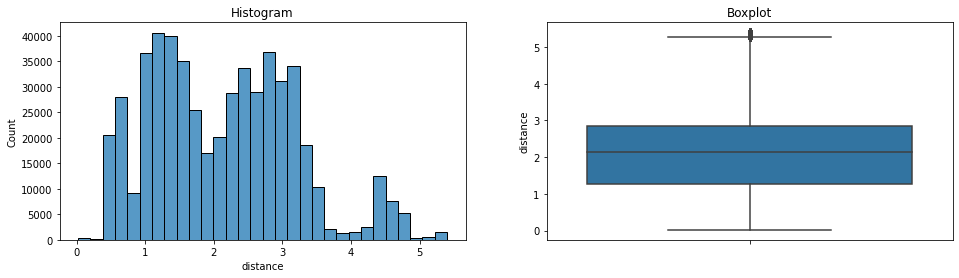

In [48]:
# Cari Outlier 

print('distance - Before Trimming')
diagnostic_plots_X(X_train, 'distance')
print('\ndistance - After Trimming')
diagnostic_plots_X(X_train_trimmed, 'distance')

surge_multiplier - Before Trimming


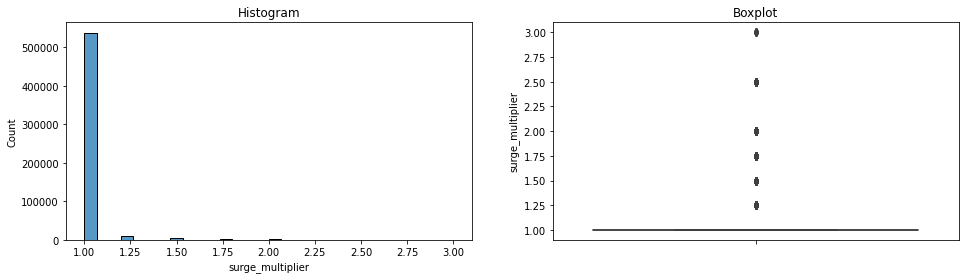


surge_multiplier - After Trimming


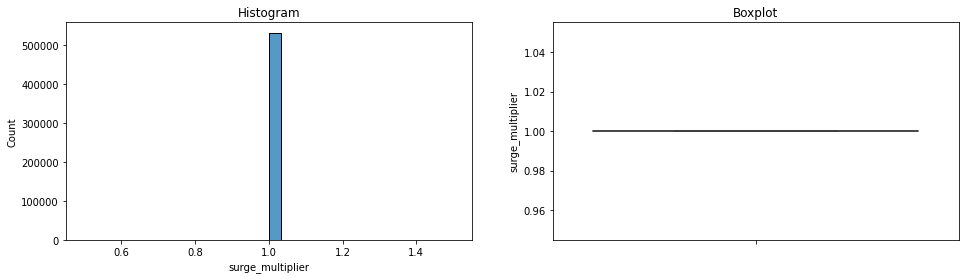

In [49]:
print('surge_multiplier - Before Trimming')
diagnostic_plots_X(X_train, 'surge_multiplier')
print('\nsurge_multiplier - After Trimming')
diagnostic_plots_X(X_train_trimmed, 'surge_multiplier')

surge_multiplier - Before Trimming


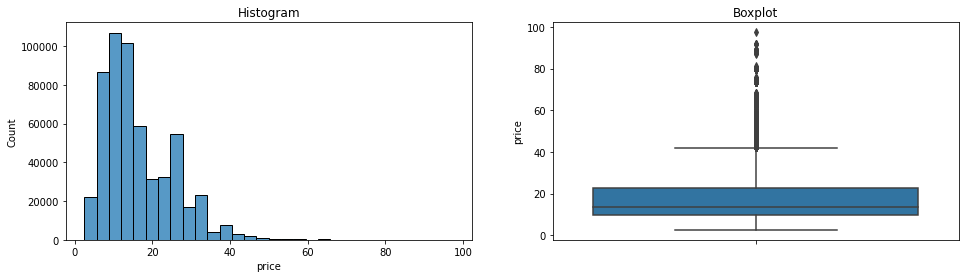


surge_multiplier - After Trimming


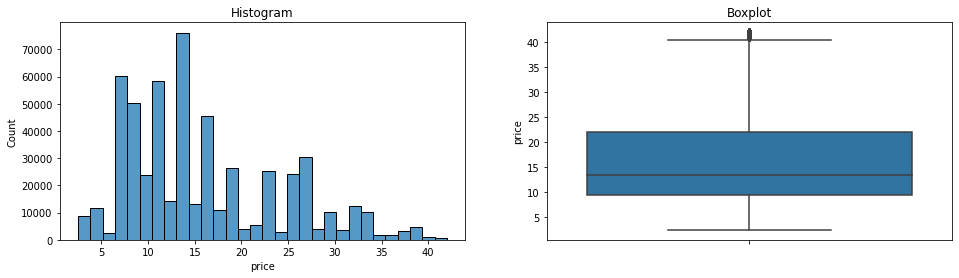

In [50]:
print('surge_multiplier - Before Trimming')
diagnostic_plots_y(y_train)
print('\nsurge_multiplier - After Trimming')
diagnostic_plots_y(y_train_trimmed)

Bisa dilihat  dari 3 visualisasi di atas khususnya di boxplot setelah dilakukan handling outlier 

distance, surge_multiplier dan price sudah tidak memiliki outlier 

### Feature Selection

Pada bagian ini akan dilakukan pemilihan feature (kolom) apa saja yang akan digunakan.

Berdasarakan hasil EDA, akan diasumsikan bahwa kolom `price` hanya memliki hubungan dengan kolom `distance`,`surge_multiplier` dan `name`. 

`distance`,`surge_multiplier` sebagai numerical column

`name` sebagai categorical column

Maka kolom-kolom tersebut yang akan dijadikan feature dengan `price` sebagai targetnya.

In [51]:
num_columns = X_train[['distance', 'surge_multiplier']].columns.tolist()
cat_columns = X_train[['name']].columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['distance', 'surge_multiplier']
Categorical Columns :  ['name']


In [52]:
# Split Train-set and Test-set based on column types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

### Feature Scaling

Feature Scaling menggunakan MinMaxScaler 

In [53]:
#cek X_train_num
X_train_num.head()

distance  surge_multiplier
300658      0.57               1.0
88166       3.28               1.0
60686       4.98               1.0
81438       2.45               1.0
597420      4.45               1.0

In [54]:
# Feature scaling using MinMaxScaler, defaultnya jadi range 0 s/d 1

scaler = MinMaxScaler()
scaler.fit(X_train_num) # .fit hanya milik train

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.07015306, 0.        ],
       [0.41581633, 0.        ],
       [0.63265306, 0.        ],
       ...,
       [0.42984694, 0.        ],
       [0.30102041, 0.        ],
       [0.19005102, 0.        ]])

### Feature Encoding

Feature Encoding menggunakan OrdinalEncoder 

In [55]:
encoder = OrdinalEncoder()
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_cat_encoded

array([[4.],
       [6.],
       [7.],
       ...,
       [4.],
       [1.],
       [2.]])

### Concate Features

In [1]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

NameError: name 'np' is not defined

In [57]:
# Display as DataFrame

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns+cat_columns])
X_train_final_df

distance surge_multiplier  name
0       0.070153              0.0   4.0
1       0.415816              0.0   6.0
2       0.632653              0.0   7.0
3       0.309949              0.0   5.0
4       0.565051              0.0   7.0
...          ...              ...   ...
554443  0.174745              0.0   0.0
554444  0.067602              0.0  10.0
554445  0.429847              0.0   4.0
554446  0.301020              0.0   1.0
554447  0.190051              0.0   2.0

[554448 rows x 3 columns]

## VI. Model Definition

yang saya pakai untuk model definition adalah **Linear Regression**

model_lin_reg adalah model **Linear Regression** biasa.



In [58]:
# Training using LinearRegression

from sklearn.linear_model import LinearRegression
model_lin_reg = LinearRegression()


## VII. Model Training

In [59]:
y_train

300658    27.5
88166     19.5
60686      9.0
81438      9.0
597420     9.0
          ... 
496379    16.0
328599     8.0
570508    38.0
572333    34.0
431909    13.5
Name: price, Length: 554448, dtype: float64

In [60]:
X_train_final.shape

(554448, 3)

In [61]:
# Train the model

model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

In [62]:
# Predict train-set and test-set

y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)

y_pred_train

array([14.6773506 , 18.91938828, 21.92528674, ..., 21.91027963,
       23.38289623, 19.79708277])

## VIII. Model Evaluation

### Model Evaluation : Linear Regression

In [63]:
# Evaluate Linear Regression Model

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE Train-Set Linear : ', mean_absolute_error(y_train, y_pred_train))
print('MAE Test-Set Linear : ', mean_absolute_error(y_test, y_pred_test))

print('MSE Train-Set Linear : ', mean_squared_error(y_train, y_pred_train))
print('MSE Test-Set Linear : ', mean_squared_error(y_test, y_pred_test))

print('RMSE Train-Set Linear : ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE Test-Set Linear : ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2 Train-Set Linear : ', r2_score(y_train, y_pred_train))
print('R2 Test-Set Linear : ', r2_score(y_test, y_pred_test))

MAE Train-Set Linear :  5.09377663469663
MAE Test-Set Linear :  5.078820189868427
MSE Train-Set Linear :  41.696439543747395
MSE Test-Set Linear :  41.23054259457264
RMSE Train-Set Linear :  6.457278028995453
RMSE Test-Set Linear :  6.421101353706593
R2 Train-Set Linear :  0.48543867429551313
R2 Test-Set Linear :  0.4808323959058034


## IX. Model Saving dan Model Inference

In [64]:
import pickle

with open('model_scaler.pkl', 'wb') as file_1:  # nama file, wb write binary, as aliasnya
  pickle.dump(scaler, file_1)  # masukin yang fit dan aliasnya

with open('model_encoder.pkl', 'wb') as file_2:
  pickle.dump(encoder, file_2)

with open('model_lin_reg.pkl', 'wb') as file_3:
  pickle.dump(model_lin_reg, file_3)

with open('list_num_columns.txt', 'w') as file_4:
  file_4.write(str(num_columns))

with open('list_cat_columns.txt', 'w') as file_5:
  file_5.write(str(cat_columns))

In [65]:
# Load All Models

with open('model_scaler.pkl', 'rb') as file_1:
  model_scaler = pickle.load(file_1)

with open('model_encoder.pkl', 'rb') as file_2:
  model_encoder = pickle.load(file_2)

with open('model_lin_reg.pkl', 'rb') as file_3:
  model_lin_reg = pickle.load(file_3)

with open('list_num_columns.txt', 'r') as file_4:
  list_num_columns = file_4.read()

with open('list_cat_columns.txt', 'r') as file_5:
  list_cat_columns = file_5.read()

In [66]:
# Convert num_columns and cat_columns into list

import ast

list_num_columns = ast.literal_eval(list_num_columns)
list_cat_columns = ast.literal_eval(list_cat_columns)
list_num_columns

['distance', 'surge_multiplier']

In [67]:
data_inf[['price']]

price
0   27.5
1    9.0
2   13.5
3    8.5
4   22.5
5    7.0
6   13.5
7   27.5
8    9.5
9   16.0

In [68]:
# Display data_df
data_inf.head()

id     timestamp  hour  day  month  \
0  66a79fdc-1595-42b3-b28f-285aaebfcaec  1.544883e+09    14   15     12   
1  cf48b3da-90d2-4bdd-a3f9-a0aa132ec165  1.544912e+09    22   15     12   
2  ea45cca5-81f9-47c5-93ec-e7d82e68a9f6  1.543492e+09    11   29     11   
3  352a8c51-907c-46bc-b622-85357609c988  1.543778e+09    19    2     12   
4  68581606-3daf-46ac-a09f-cac09a9f76dc  1.544705e+09    12   13     12   

              datetime          timezone              source  \
0  2018-12-15 14:10:03  America/New_York    Theatre District   
1  2018-12-15 22:15:10  America/New_York  Financial District   
2  2018-11-29 11:42:56  America/New_York           North End   
3  2018-12-02 19:17:57  America/New_York       South Station   
4  2018-12-13 12:50:15  America/New_York            Back Bay   

         destination cab_type  ... precipIntensityMax uvIndexTime  \
0  Boston University     Lyft  ...             0.0074  1544893200   
1          North End     Uber  ...             0.0074  1544893200   
2      North Station     Lyft  ...             0.0000  1543507200   
3      North Station     Uber  ...             0.0916  1543770000   
4   Haymarket Square     Uber  ...             0.0001  1544720400   

   temperatureMin  temperatureMinTime  temperatureMax  temperatureMaxTime  \
0           39.54          1544929200           54.47          1544896800   
1           39.48          1544929200           54.47          1544896800   
2           34.67          1543550400           45.03          1543510800   
3           36.32          1543726800           50.80          1543788000   
4           18.11          1544688000           33.51          1544731200   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   36.46                  1544929200                   53.80   
1                   36.40                  1544929200                   53.80   
2                   30.30                  1543550400                   38.53   
3                   35.84                  1543748400                   50.13   
4                   14.08                  1544688000                   32.84   

  apparentTemperatureMaxTime  
0                 1544896800  
1                 1544896800  
2                 1543510800  
3                 1543788000  
4                 1544731200  

[5 rows x 57 columns]

In [69]:
# Split between num columns and cat columns

data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

data_inf_num

distance  surge_multiplier
0      4.77               1.0
1      1.21               1.0
2      1.07               1.0
3      1.84               1.0
4      2.32               1.0
5      3.22               1.0
6      1.22               1.0
7      1.04               1.0
8      2.79               1.0
9      1.46               1.0

In [70]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_cat_encoded = model_encoder.transform(data_inf_cat)
data_inf_num_scaled

array([[0.60586735, 0.        ],
       [0.15178571, 0.        ],
       [0.13392857, 0.        ],
       [0.23214286, 0.        ],
       [0.29336735, 0.        ],
       [0.40816327, 0.        ],
       [0.15306122, 0.        ],
       [0.13010204, 0.        ],
       [0.35331633, 0.        ],
       [0.18367347, 0.        ]])

In [71]:
# Concate

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)
data_inf_final

array([[ 0.60586735,  0.        ,  2.        ],
       [ 0.15178571,  0.        , 12.        ],
       [ 0.13392857,  0.        ,  2.        ],
       [ 0.23214286,  0.        , 10.        ],
       [ 0.29336735,  0.        ,  0.        ],
       [ 0.40816327,  0.        ,  7.        ],
       [ 0.15306122,  0.        ,  6.        ],
       [ 0.13010204,  0.        ,  1.        ],
       [ 0.35331633,  0.        , 10.        ],
       [ 0.18367347,  0.        ,  0.        ]])

In [72]:
# Predict Data Inference

y_pred_inf = model_lin_reg.predict(data_inf_final)
y_pred_inf

array([28.15855392,  5.48384311, 18.66854065,  9.80846606, 24.58338204,
       17.41111826, 13.63575927, 19.94597251, 12.24509109, 22.37759517])

In [73]:
# Convert into DataFrame

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['price_prediction'])
y_pred_inf_df

price_prediction
0         28.158554
1          5.483843
2         18.668541
3          9.808466
4         24.583382
5         17.411118
6         13.635759
7         19.945973
8         12.245091
9         22.377595

In [74]:
# Merge
pd_inf = pd.concat([data_inf, y_pred_inf_df], axis = 1)
pd_inf

id     timestamp  hour  day  month  \
0  66a79fdc-1595-42b3-b28f-285aaebfcaec  1.544883e+09    14   15     12   
1  cf48b3da-90d2-4bdd-a3f9-a0aa132ec165  1.544912e+09    22   15     12   
2  ea45cca5-81f9-47c5-93ec-e7d82e68a9f6  1.543492e+09    11   29     11   
3  352a8c51-907c-46bc-b622-85357609c988  1.543778e+09    19    2     12   
4  68581606-3daf-46ac-a09f-cac09a9f76dc  1.544705e+09    12   13     12   
5  eaaadef4-1396-4ba6-a0ca-53e75bdfd077  1.543632e+09     2    1     12   
6  a28f68a0-5f2d-4dd2-b2a9-5d90858736c5  1.543723e+09     4    2     12   
7  2c54f601-0116-4feb-a04e-044082949175  1.543246e+09    15   26     11   
8  ada64d05-007e-4490-96d9-cb26165fc177  1.545010e+09     1   17     12   
9  9e6f172e-ff40-478a-9b80-6a90156f87f5  1.543276e+09    23   26     11   

              datetime          timezone                   source  \
0  2018-12-15 14:10:03  America/New_York         Theatre District   
1  2018-12-15 22:15:10  America/New_York       Financial District   
2  2018-11-29 11:42:56  America/New_York                North End   
3  2018-12-02 19:17:57  America/New_York            South Station   
4  2018-12-13 12:50:15  America/New_York                 Back Bay   
5  2018-12-01 02:42:59  America/New_York  Northeastern University   
6  2018-12-02 04:03:03  America/New_York       Financial District   
7  2018-11-26 15:23:09  America/New_York                North End   
8  2018-12-17 01:25:08  America/New_York        Boston University   
9  2018-11-26 23:45:14  America/New_York                North End   

          destination cab_type  ... uvIndexTime temperatureMin  \
0   Boston University     Lyft  ...  1544893200          39.54   
1           North End     Uber  ...  1544893200          39.48   
2       North Station     Lyft  ...  1543507200          34.67   
3       North Station     Uber  ...  1543770000          36.32   
4    Haymarket Square     Uber  ...  1544720400          18.11   
5       North Station     Lyft  ...  1543593600          28.64   
6    Haymarket Square     Lyft  ...  1543683600          31.55   
7  Financial District     Uber  ...  1543251600          40.74   
8         Beacon Hill     Uber  ...  1544979600          39.07   
9         Beacon Hill     Uber  ...  1543251600          40.45   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1544929200           54.47          1544896800   
1          1544929200           54.47          1544896800   
2          1543550400           45.03          1543510800   
3          1543726800           50.80          1543788000   
4          1544688000           33.51          1544731200   
5          1543575600           42.57          1543600800   
6          1543658400           44.72          1543690800   
7          1543233600           46.27          1543255200   
8          1544954400           43.70          1544990400   
9          1543233600           46.49          1543255200   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   36.46                  1544929200                   53.80   
1                   36.40                  1544929200                   53.80   
2                   30.30                  1543550400                   38.53   
3                   35.84                  1543748400                   50.13   
4                   14.08                  1544688000                   32.84   
5                   27.20                  1543568400                   40.51   
6                   27.95                  1543658400                   44.05   
7                   37.46                  1543291200                   43.78   
8                   33.64                  1545019200                   38.29   
9                   37.17                  1543291200                   43.84   

   apparentTemperatureMaxTime price_prediction  
0                  1544896800        28.158554  
1                  1544896800         5.483843  
2            

In [75]:
hasil = []

# kolom pts
# kolom opp_pts

for i in range(0, len(pd_inf)): 
    selisih = pd_inf.loc[i, 'price'] - pd_inf.loc[i, 'price_prediction']
    hasil.append(selisih)

pd_inf['selisih'] = hasil

In [76]:
pd_inf = pd_inf[['price','price_prediction','selisih']]

In [77]:
pd_inf.head(10)

price  price_prediction    selisih
0   27.5         28.158554  -0.658554
1    9.0          5.483843   3.516157
2   13.5         18.668541  -5.168541
3    8.5          9.808466  -1.308466
4   22.5         24.583382  -2.083382
5    7.0         17.411118 -10.411118
6   13.5         13.635759  -0.135759
7   27.5         19.945973   7.554027
8    9.5         12.245091  -2.745091
9   16.0         22.377595  -6.377595

## XI. Pengambilan Kesimpulan

In [78]:
# Get Intercept and Slope

intercept = model_lin_reg.intercept_
slope = model_lin_reg.coef_

print('Intercept : ', intercept)
print('Slope : ', slope)

Intercept :  18.68418459823475
Slope :  [20.10856867 37.19490289 -1.35437791]


In [79]:
# Display Column's Name

X_train_final_df.columns.tolist()

[('distance',), ('surge_multiplier',), ('name',)]

Persamaan Regresi

y = 18.68418459823475 + (20.10856867 x distance) + (37.19490289 x surge_multiplier) + (-1.35437791 x name)

Kesimpulan :

1) Model Machine Learning yang paling bagus untuk prediksi price di dataset ini adalah Linear Regression dengan hasil evaluasi sebagai berikut :
- MAE Train-Set Linear :  5.09377663469663
- MAE Test-Set Linear :  5.078820189868427
- MSE Train-Set Linear :  41.696439543747395
- MSE Test-Set Linear :  41.23054259457264
- RMSE Train-Set Linear :  6.457278028995453
- RMSE Test-Set Linear :  6.421101353706593
- R2 Train-Set Linear :  0.48543867429551313
- R2 Test-Set Linear :  0.4808323959058034

2) Performa model masih kurang bagus. Sepertinya data ini kurang cocok untuk diterapkan model linear.

3) Hasil prediksi data inference kurang bagus disebabkan karena performa model juga kurang bagus.

4) Persamaan regresi yang didapat adalah **y = 18.68418459823475 + (20.10856867 x distance) + (37.19490289 x surge_multiplier) + (-1.35437791 x name)**

- artinya coefisien fitur tersebut merepresentasikan besarnya pengaruh tiap fitur terhadap hasil prediksi price.

##### insight EDA

5) Dari Visualisasi tersebut yang menarik perhatian saya adalah ada apa dengan tanggal 9 dan 10, yang menyebabkan pemesanan uber dan lyft menurun drastis

   ternyata adanya missing data dari tanggal 5 sampai tanggal 8 dan berpengaruh juga di tanggal 4, 9 dan 10. sehingga terkesan bahwa tanggal 9 dan 10 mengalami penurunan drastis

6) Desember mempunyai lebih banyak data dari November karena range data dari tanggal 11-26-2018 to 12-18-2018. 5 hari di bulan November dan 18 hari di bulan Desember

7) Terlihat bahwa uber mendapatkan pemesanan sebanyak 385663 yaitu 55.64% dari total dataset sedangkan Lyft memiliki pemesanan sebanyak 307408 yaitu 44.35% dari total dataset ini yang membuat uber mendominasi pemesanan dari mulai jam,hari dan bulan. yang menariknya adalah tidak ada satu hari pun lyft mengalahkan pemesanan uber